## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** - is prediction target
* **bedroomsNumber** - of Bedrooms/House
* **bathroomsNumber** - of bathrooms/bedrooms
* **sqft_livingsquare** - footage of the home
* **sqft_lotsquare** - footage of the lot
* **floorsTotal** - floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
import warnings
warnings.filterwarnings(action= 'ignore', category= UserWarning)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
import statsmodels.formula as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


# EDA (Exploratory Data Analysis)

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
pd.set_option('display.max_columns',None)
print(df.shape)
df.head()


(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Change dates to datetime

In [4]:
def to_datetime(df):
    df['date'] = pd.to_datetime(df.date)
    return df

df = to_datetime(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [6]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


### Deal with null values

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [9]:
missing_value_df

,column_name,percent_missing
id,id,0.000000
date,date,0.000000
price,price,0.000000
bedrooms,bedrooms,0.000000
bathrooms,bathrooms,0.000000
sqft_living,sqft_living,0.000000
sqft_lot,sqft_lot,0.000000
floors,floors,0.000000
waterfront,waterfront,11.001528
view,view,0.291707


In [10]:
df.waterfront.value_counts(normalize=True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

In [11]:
# Fill waterfront, view and yr_renovated nulls with a 0
df = df.fillna(0)

In [12]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [13]:
for col in df.columns:
    print(col)
    print(df[col].value_counts(normalize = True, ascending=False).head(5))
    print("-------------------------------------------------------------")

id
795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64
-------------------------------------------------------------
date
2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
Name: date, dtype: float64
-------------------------------------------------------------
price
350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64
-------------------------------------------------------------
bedrooms
3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64
-------------------------------------------------------------
bathrooms
2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64
-------------------------------------------------------------
sqft_living
1300    0.00

We see that **sqft_basement** has some **?** values.  These need to be changed.  Nearly 60% of the data
has a value of 0 for **sqft_basement** so we will make these values 0

In [14]:
df['sqft_basement'] = df.sqft_basement.replace(to_replace='?', value = 0.0)

In [15]:
df['sqft_basement'].value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
20.0          1
2250.0        1
283.0         1
652.0         1
2190.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [16]:
df['sqft_basement'] = df['sqft_basement'].astype('float')

### Deal with outliers

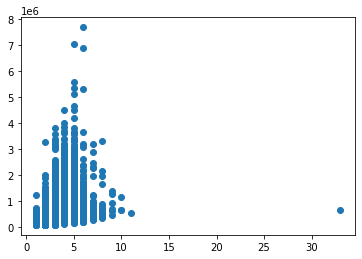

In [17]:
plt.scatter(df.bedrooms,df.price)

In [18]:
#We have an outlier in bedroom number that needs to be dropped
df.sort_values(by='bedrooms', ascending=False).head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400


In [19]:
# 33 bedroom house has been dropped
df = df.drop(index=15856, axis=0)

#### Cut some outliers from price

In [20]:
len(df[df['price'] > 1500000])

516

In [21]:
# Drop the houses priced over 1,500,000.. because there aren't many
df = df[df['price'] < 1500000]

<AxesSubplot:>

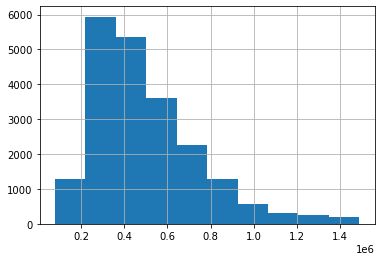

In [22]:
df.price.hist()

In [23]:
len(df[df['price'] < 1500000])

21061

/Users/riptonrosen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

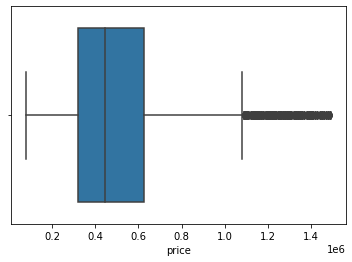

In [24]:
sns.boxplot(df['price'])

In [25]:
len(df['price'])

21061

#### Cut some outliers from bedrooms

Look for outliers in the number of bedroom

/Users/riptonrosen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

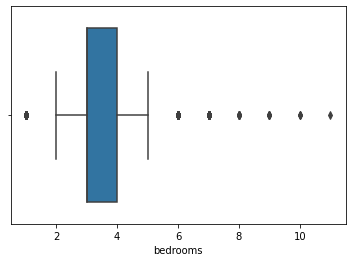

In [26]:
sns.boxplot(df['bedrooms'])

In [27]:
len(df[df['bedrooms'] > 5])

299

In [28]:
df = df[df['bedrooms'] < 5]

#### Cut some outliers from bathrooms

In [29]:
len(df[df['bathrooms'] > 4])

54

In [30]:
df = df[df['bathrooms'] < 4]

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

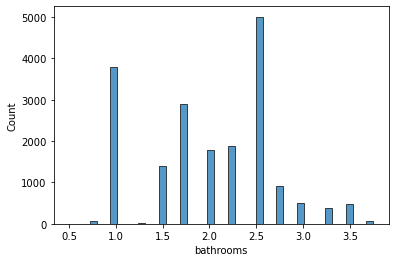

In [31]:
sns.histplot(df['bathrooms'])

In [32]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Cut some outliers from sqft_lot

<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

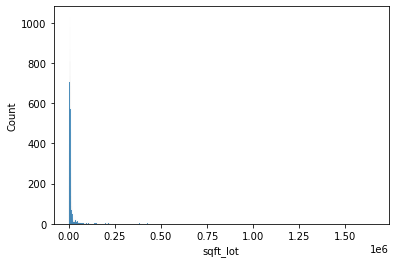

In [33]:
sns.histplot(df['sqft_lot'])

In [34]:
len(df[df['sqft_lot'] > 100000])

396

In [35]:
df = df[df['sqft_lot'] < 100000]

In [36]:
len(df['sqft_lot'])

18803

In [37]:
for i in range(85, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.85 percentile: 713000.0
0.86 percentile: 725000.0
0.87 percentile: 744000.0
0.88 percentile: 760000.0
0.89 percentile: 775000.0
0.9 percentile: 796000.0
0.91 percentile: 815000.0
0.92 percentile: 839998.4
0.93 percentile: 865000.0
0.94 percentile: 898841.439999999
0.95 percentile: 932799.7999999959
0.96 percentile: 978000.0
0.97 percentile: 1050000.0
0.98 percentile: 1160000.0


### Look for duplicates

There are 177 id duplicates, probably due to houses being sold twice.  The model will treat them as different data points, still

In [38]:
len(df[df.duplicated(subset='id')])

150

Define columns

In [39]:
cols = ['sqft_living', 'sqft_lot', 'waterfront', 'view', 'bedrooms', 'bathrooms', 'zipcode', 'sqft_living15',\
        'sqft_lot15', 'price']

### Create heatmap to see where there's a high enough correlation to drop a column

<AxesSubplot:>

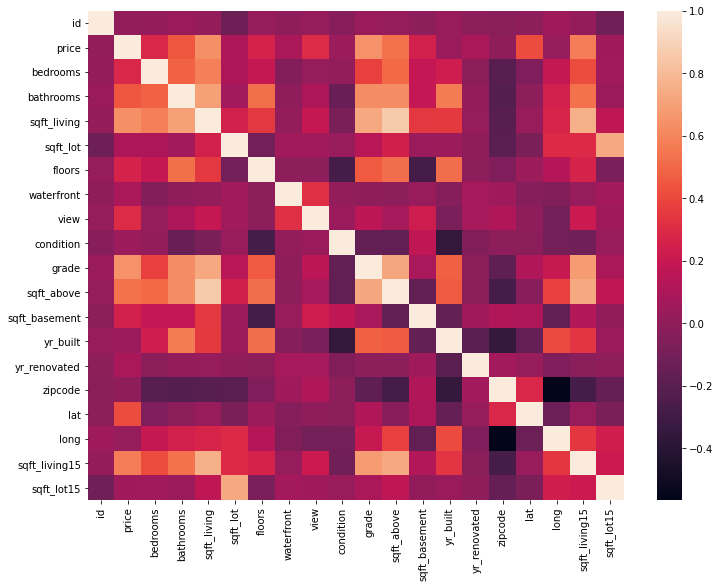

In [40]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

Sqft_above and sqft_living have a high enough correlation that we can drop one.  Sqft_above has been chosen.

## Create a covariance matrix

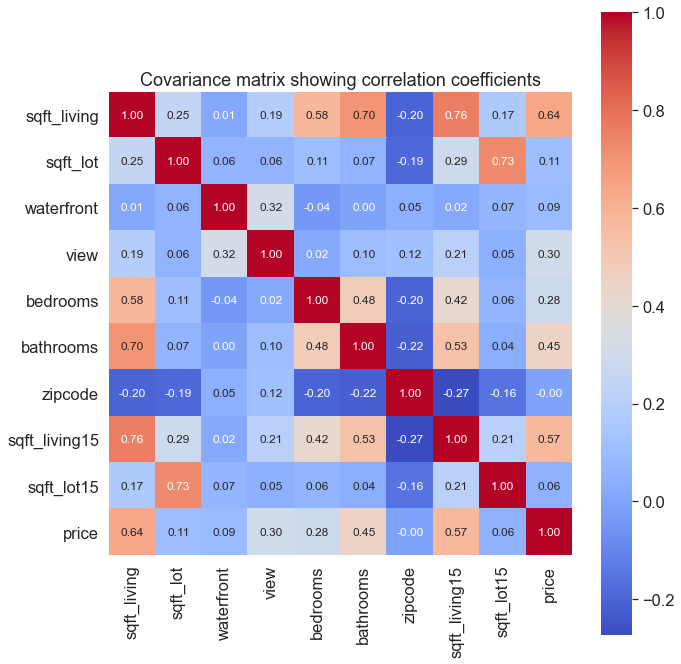

In [41]:

stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df[cols].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

In [42]:
df.drop(columns = 'sqft_above',inplace = True)

In [43]:
df.sort_values(by='price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16204,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0.0,2.0,3,12,0.0,1990,0.0,98034,47.6995,-122.228,4050,14226
509,3885805665,2014-06-12,1490000.0,4,3.75,4030,10800,2.0,0.0,0.0,3,10,0.0,2006,0.0,98033,47.6821,-122.196,2160,7200
20807,7582700075,2014-10-02,1490000.0,4,3.50,3930,6120,2.0,0.0,0.0,3,10,620.0,2007,0.0,98105,47.6646,-122.280,3390,6120
7224,6448000020,2015-01-29,1490000.0,4,2.50,2420,18480,1.0,0.0,0.0,4,9,0.0,1967,0.0,98004,47.6214,-122.227,3330,19910
7543,3885805175,2014-10-01,1490000.0,4,3.25,3730,7200,2.0,0.0,0.0,3,10,920.0,2006,0.0,98033,47.6824,-122.199,2490,7200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,2014-05-08,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,5,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
8267,3883800011,2014-11-05,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3,6,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
16184,3028200080,2015-03-24,81000.0,2,1.00,730,9975,1.0,0.0,0.0,1,5,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2,4,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500


In [44]:
df.reset_index(inplace=True)

## Feature engineering -- differentiate categoricals and continuous variables

In [45]:
df.nunique()

index            18803
id               18653
date               371
price             3266
bedrooms             4
bathrooms           14
sqft_living        821
sqft_lot          8598
floors               6
waterfront           2
view                 5
condition            5
grade               10
sqft_basement      242
yr_built           116
yr_renovated        69
zipcode             70
lat               4899
long               708
sqft_living15      699
sqft_lot15        7657
dtype: int64

We can see which columns are categorical and which are continuous variables based on how many unique values they have.
Categorical variables are generally subjective and have less unique values.

In [46]:
cont = []
cat = []

for col in df.columns:
    if (df[col].nunique() < 25):
        cat.append(col)
    else:
        cont.append(col)

In [47]:
cont

['index',
 'id',
 'date',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [48]:
cat

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

## One-hot encoding

In [49]:
dummies = pd.get_dummies(df[cat].astype('category'), drop_first=True)

kc_preprocessed = df.drop(cat, axis = 1)
kc_preprocessed = pd.concat([kc_preprocessed, dummies], axis=1)
kc_preprocessed.head()

,index,id,date,price,sqft_living,sqft_lot,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_2,bedrooms_3,bedrooms_4,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,0,7129300520,2014-10-13,221900.0,1180,5650,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,1,6414100192,2014-12-09,538000.0,2570,7242,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,2,5631500400,2015-02-25,180000.0,770,10000,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,3,2487200875,2014-12-09,604000.0,1960,5000,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,4,1954400510,2015-02-18,510000.0,1680,8080,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


## Create a pairplot in order to check correlation with the predictor variables

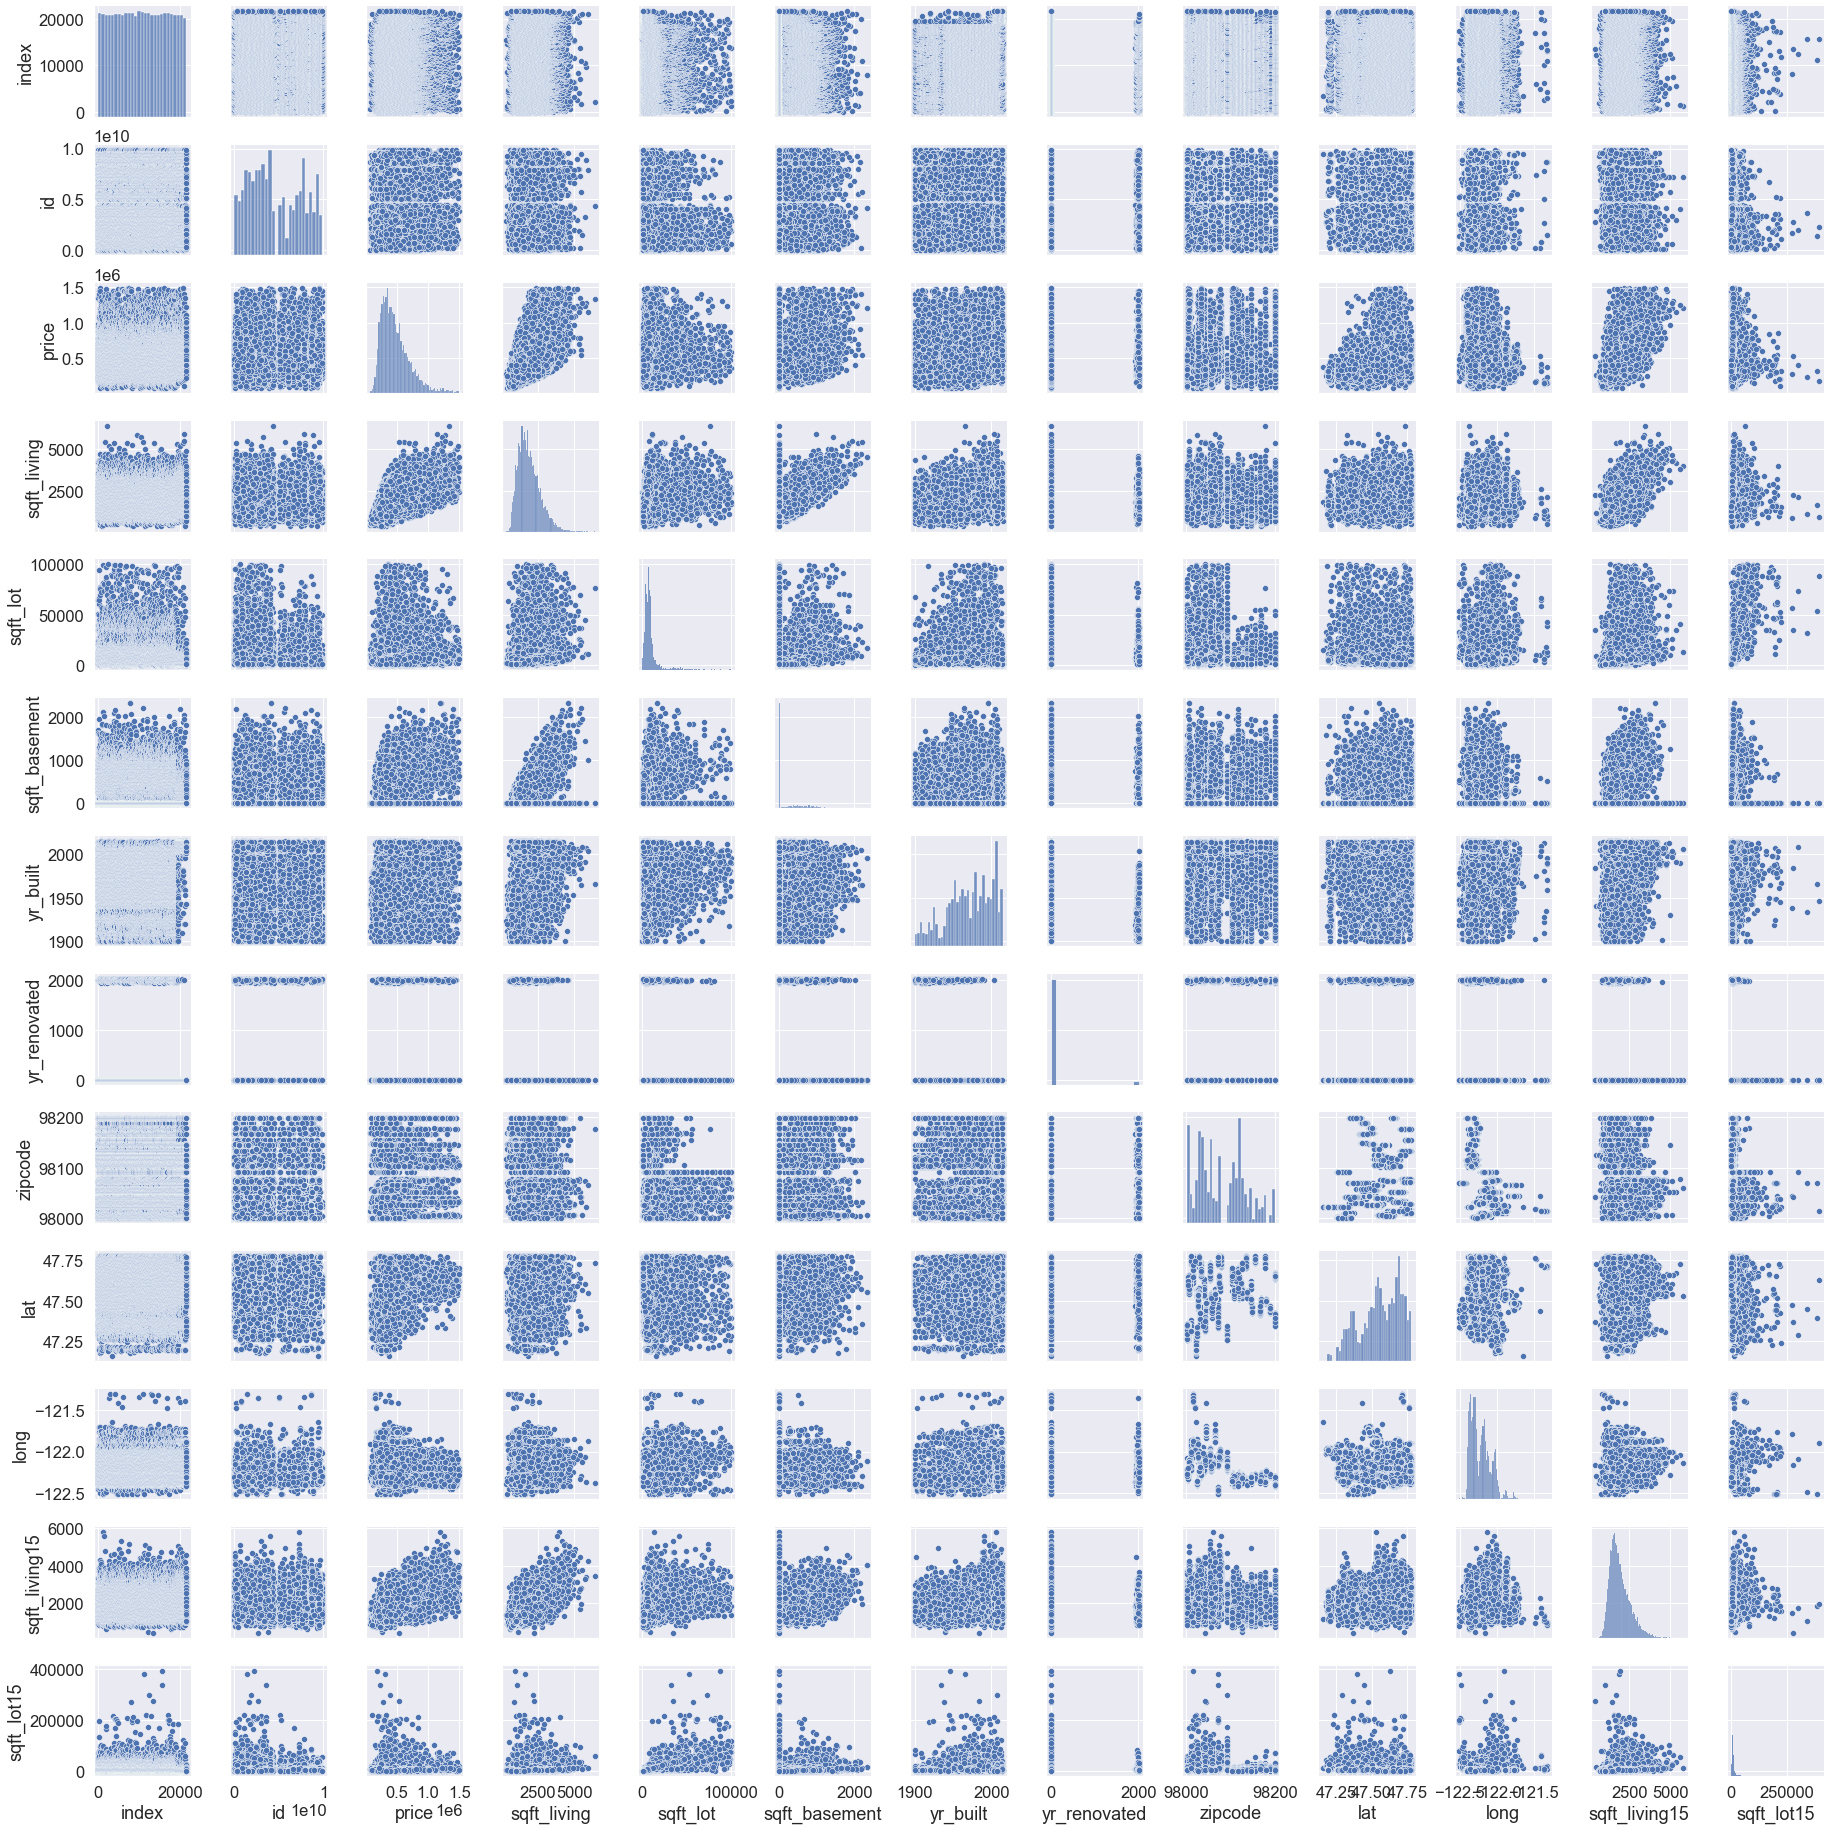

In [50]:
sns.pairplot(df[cont], size=2.0)

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

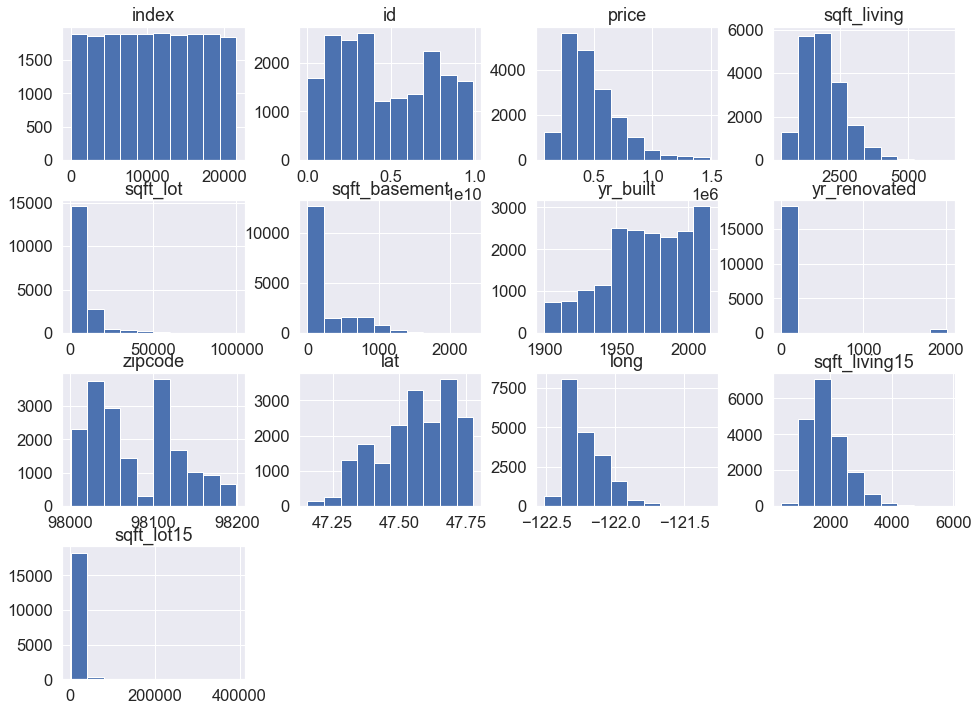

In [51]:
df[cont].hist(figsize=(16,12))

## Kings County Map

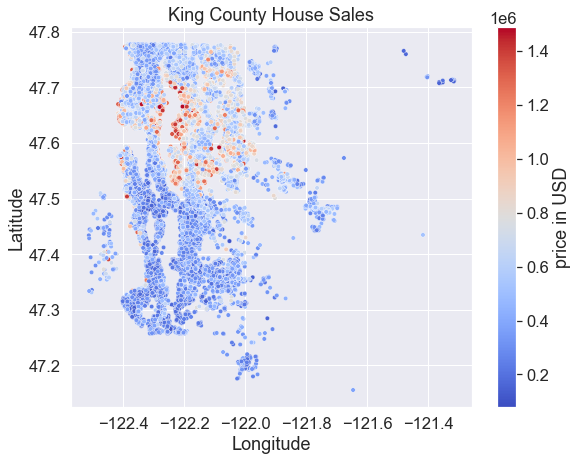

In [52]:
plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = df['long'], y = df['lat'], hue = df['price'],
                palette = 'coolwarm',s=20, legend = None, data = df)

norm = plt.Normalize(df['price'].min(), df['price'].max())
smap = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          18803 non-null  int64         
 1   id             18803 non-null  int64         
 2   date           18803 non-null  datetime64[ns]
 3   price          18803 non-null  float64       
 4   bedrooms       18803 non-null  int64         
 5   bathrooms      18803 non-null  float64       
 6   sqft_living    18803 non-null  int64         
 7   sqft_lot       18803 non-null  int64         
 8   floors         18803 non-null  float64       
 9   waterfront     18803 non-null  float64       
 10  view           18803 non-null  float64       
 11  condition      18803 non-null  int64         
 12  grade          18803 non-null  int64         
 13  sqft_basement  18803 non-null  float64       
 14  yr_built       18803 non-null  int64         
 15  yr_renovated   1880

In [54]:
df_cat = df[cat]

<AxesSubplot:>

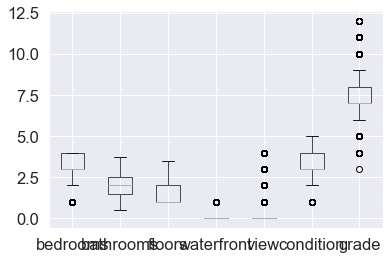

In [55]:
df_cat.boxplot()

# Model 1, just the normal data

In [56]:
outcome = 'price'
x_cols = df.drop(['price', 'date', 'id', 'zipcode', 'index'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [57]:
model_1 = ols(formula= f, data = df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2784.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:19:55   Log-Likelihood:            -2.4776e+05
No. Observations:               18803   AIC:                         4.956e+05
Df Residuals:                   18786   BIC:                         4.957e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.506e+07   1.09e+06    -23.002      0.000   -2.72e+07   -2.29e+07
bedrooms      -1.659e+04   1680.893     -9.872      0.000   -1.99e+04   -1.33e+04
bathrooms      2.635e+04   2402.801     10.966      0.000    2.16e+04    3.11e+04
sqft_living      90.9056      2.878     31.589      0.000      85.265      96.546
sqft_lot         -0.4394      0.129     -3.417      0.001      -0.692      -0.187
floors         2.799e+04   2499.696     11.196      0.000    2.31e+04    3.29e+04
waterfront     1.984e+05   1.68e+04     11.836      0.000    1.66e+05    2.31e+05
view           3.904e+04   1593.889     24.496      0.000    3.59e+04    4.22e+04
condition      3.004e+04   1592.330     18.862      0.000    2.69e+04    3.32e+04
grade          8.234e+04   1523.005     54.065      0.000    7.94e+04    8.53e+04
sqft_basement     0.9123      3.324      0.274      0.784      -5.603       7.427
yr_built      -1980.5430     49.920    -39.674      0.000   -2078.392   -1882.694
yr_renovated     20.3398      2.837      7.169      0.000      14.779      25.901
lat            5.319e+05   7072.782     75.200      0.000    5.18e+05    5.46e+05
long          -2.545e+04   8192.012     -3.106      0.002   -4.15e+04   -9389.650
sqft_living15    52.2733      2.600     20.105      0.000      47.177      57.370
sqft_lot15       -0.1927      0.100     -1.931      0.054      -0.388       0.003
==============================================================================
Omnibus:                     3836.794   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12718.509
Skew:                           1.027   Prob(JB):                         0.00
Kurtosis:                       6.466   Cond. No.                     2.54e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check the MSE (MEan Squared Error) for the model

Train MSE: 16352342893.397644
Test MSE: 16132945957.77693
RMSE Train: 127876.27963542592
RMSE Test: 127015.53431677926


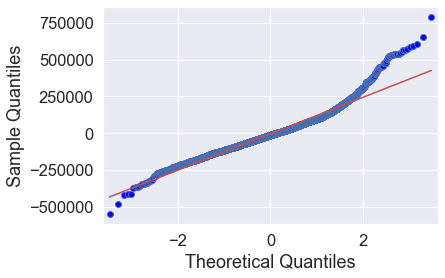

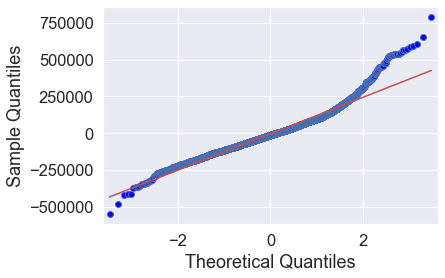

In [58]:
data = df.copy()

y = data['price']
X = data.drop(['price', 'date', 'id', 'zipcode'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

### Check for homoscedasticity

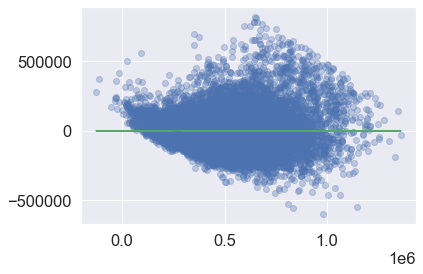

In [59]:
plt.scatter(model_1.predict(df), model_1.resid, alpha = .3)
plt.plot(model_1.predict(df), [0 for i in range(len(df))], c='g')

# Model 2, with standardized data

## Create a function to standardize the continuous variables, and store them in a new DataFrame: **kc_standardized**

### For loop to differentiate which variables to standardize and which not to

In [60]:
to_stan = []
not_to_stan = []


for col in df.columns:
    if col == 'waterfront' or col == 'view' or col == 'long':
        not_to_stan.append(col)
    else:
        to_stan.append(col)

In [61]:
def standardize(feature):
    return (feature-feature.mean())/feature.std()

/Users/riptonrosen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

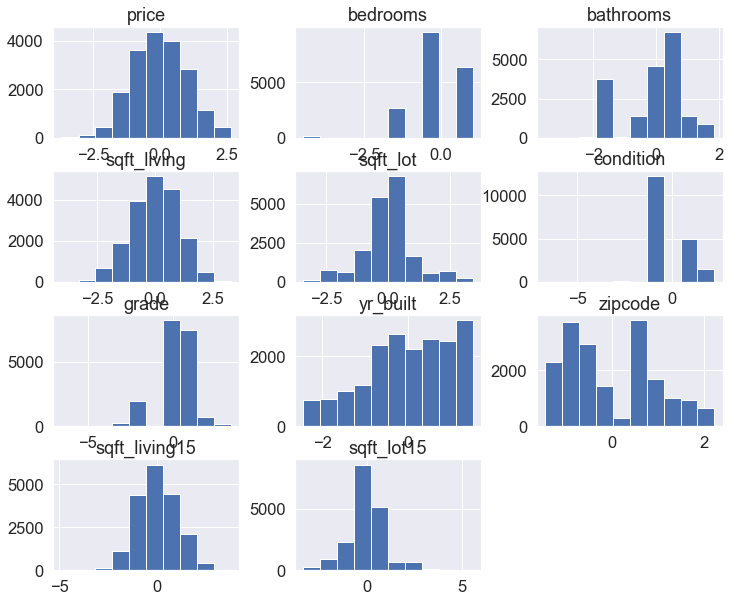

In [62]:
stand_cont_df = df[to_stan]
stand_cont_df.drop(columns = ['sqft_basement','date', 'index', 'yr_renovated', 'id', 'floors', 'lat'], inplace=True)

cont_log = np.log(stand_cont_df)
kc_standardized = cont_log.apply(standardize)
kc_standardized.hist(figsize=(12,10))

In [63]:
kc_standardized.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.283984,0.454414,0.613612,0.050152,0.046314,0.638108,0.063318,0.004912,0.558285,0.040089
bedrooms,0.283984,1.000000,0.495511,0.621784,0.214709,0.027692,0.392132,0.241449,-0.204580,0.415716,0.194501
bathrooms,0.454414,0.495511,1.000000,0.726880,0.006687,-0.113640,0.631797,0.567768,-0.233405,0.541766,0.008122
sqft_living,0.613612,0.621784,0.726880,1.000000,0.289592,-0.046443,0.716123,0.368212,-0.218676,0.734436,0.263407
sqft_lot,0.050152,0.214709,0.006687,0.289592,1.000000,0.104528,0.090753,-0.062222,-0.270312,0.352430,0.914609
condition,0.046314,0.027692,-0.113640,-0.046443,0.104528,1.000000,-0.142366,-0.333093,-0.012336,-0.092797,0.109936
grade,0.638108,0.392132,0.631797,0.716123,0.090753,-0.142366,1.000000,0.484602,-0.174136,0.651501,0.095145
yr_built,0.063318,0.241449,0.567768,0.368212,-0.062222,-0.333093,0.484602,1.000000,-0.349457,0.338222,-0.035228
zipcode,0.004912,-0.204580,-0.233405,-0.218676,-0.270312,-0.012336,-0.174136,-0.349457,1.000000,-0.280687,-0.261425
sqft_living15,0.558285,0.415716,0.541766,0.734436,0.352430,-0.092797,0.651501,0.338222,-0.280687,1.000000,0.352767


In [64]:
kc_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18803 non-null  float64
 1   bedrooms       18803 non-null  float64
 2   bathrooms      18803 non-null  float64
 3   sqft_living    18803 non-null  float64
 4   sqft_lot       18803 non-null  float64
 5   condition      18803 non-null  float64
 6   grade          18803 non-null  float64
 7   yr_built       18803 non-null  float64
 8   zipcode        18803 non-null  float64
 9   sqft_living15  18803 non-null  float64
 10  sqft_lot15     18803 non-null  float64
dtypes: float64(11)
memory usage: 1.6 MB


In [65]:
outcome = 'price'
x_cols = kc_standardized.drop(['price', 'zipcode'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [66]:
model_2 = ols(formula= f, data = kc_standardized).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     2949.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:19:56   Log-Likelihood:                -18401.
No. Observations:               18803   AIC:                         3.682e+04
Df Residuals:                   18793   BIC:                         3.690e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.288e-12      0.005   1.76e-09      1.000      -0.009       0.009
bedrooms         -0.0994      0.006    -16.303      0.000      -0.111      -0.087
bathrooms         0.0824      0.008     10.177      0.000       0.067       0.098
sqft_living       0.3117      0.010     30.771      0.000       0.292       0.332
sqft_lot         -0.1041      0.012     -8.737      0.000      -0.127      -0.081
condition         0.0566      0.005     11.194      0.000       0.047       0.067
grade             0.4618      0.008     61.102      0.000       0.447       0.477
yr_built         -0.3596      0.006    -57.481      0.000      -0.372      -0.347
sqft_living15     0.2120      0.008     28.057      0.000       0.197       0.227
sqft_lot15       -0.0658      0.012     -5.603      0.000      -0.089      -0.043
==============================================================================
Omnibus:                       93.462   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.168
Skew:                          -0.115   Prob(JB):                     1.97e-24
Kurtosis:                       3.294   Cond. No.                         6.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check the MSE for the model

Train MSE: 0.41371431357381405
Test MSE: 0.4181813353468501
RMSE Train: 0.6432062760684274
RMSE Test: 0.6466694173585528


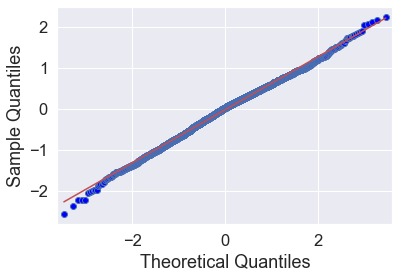

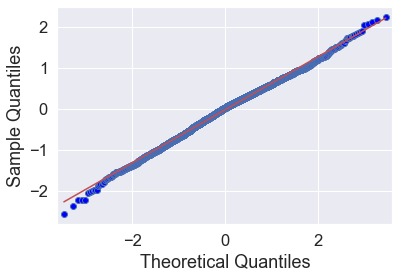

In [67]:
data = kc_standardized.copy()

y = data['price']
X = data.drop(['price', 'zipcode'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

### Use the data from model 2, concatenate the categorical variables and try the model again

In [68]:
kc_standardized = pd.concat([kc_standardized, df_cat], axis=1)

In [69]:
outcome = 'price'
x_cols = kc_standardized.drop(columns=['price', 'bedrooms'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [70]:
model_2 = ols(formula= f, data = kc_standardized).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1840.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:19:56   Log-Likelihood:                -18183.
No. Observations:               18803   AIC:                         3.640e+04
Df Residuals:                   18787   BIC:                         3.652e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.3665      0.336    -10.012      0.000      -4.026      -2.707
bathrooms[0]     -0.0995      0.027     -3.630      0.000      -0.153      -0.046
bathrooms[1]      0.2541      0.041      6.272      0.000       0.175       0.334
sqft_living       0.2392      0.009     25.674      0.000       0.221       0.257
sqft_lot         -0.0812      0.012     -6.765      0.000      -0.105      -0.058
condition[0]      0.0586      0.032      1.833      0.067      -0.004       0.121
condition[1]      0.0167      0.050      0.335      0.738      -0.081       0.114
grade[0]          0.0808      0.045      1.795      0.073      -0.007       0.169
grade[1]          0.3520      0.043      8.272      0.000       0.269       0.435
yr_built         -0.3379      0.007    -49.388      0.000      -0.351      -0.325
zipcode           0.0432      0.005      8.049      0.000       0.033       0.054
sqft_living15     0.2051      0.008     26.866      0.000       0.190       0.220
sqft_lot15       -0.0726      0.012     -6.237      0.000      -0.095      -0.050
floors            0.0893      0.012      7.413      0.000       0.066       0.113
waterfront        0.7229      0.083      8.665      0.000       0.559       0.886
view              0.0927      0.008     11.867      0.000       0.077       0.108
==============================================================================
Omnibus:                       67.767   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.224
Skew:                          -0.110   Prob(JB):                     7.63e-17
Kurtosis:                       3.215   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check the MSE for the second part of model 2

Train MSE: 0.4009152219413185
Test MSE: 0.40618814540461673
RMSE Train: 0.6331786651027642
RMSE Test: 0.6373289146152218


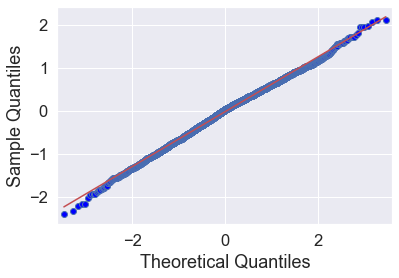

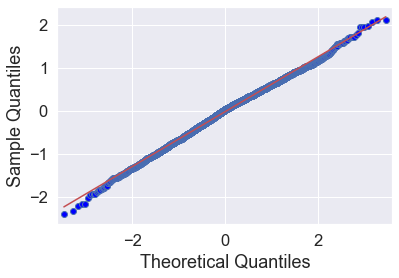

In [71]:
data = kc_standardized.copy()

y = data['price']
X = data.drop('price', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

### Check for homoscedasticity

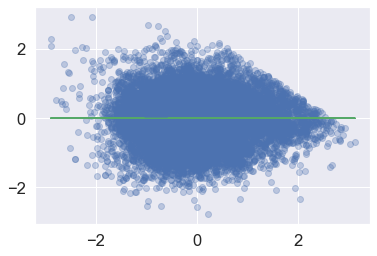

In [72]:
plt.scatter(model_2.predict(kc_standardized), model_2.resid, alpha = .3)
plt.plot(model_2.predict(kc_standardized), [0 for i in range(len(kc_standardized))], c='g')

# Model 3, log transformation

array([[<AxesSubplot:title={'center':'logPrice'}>,
        <AxesSubplot:title={'center':'logSqrLiv'}>],
       [<AxesSubplot:title={'center':'logSqLot'}>,
        <AxesSubplot:title={'center':'logSqliv15'}>]], dtype=object)

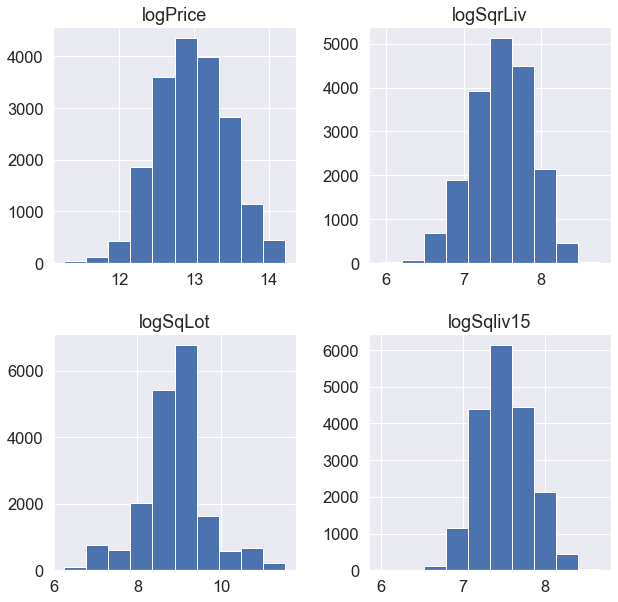

In [118]:
kc_log = pd.DataFrame([])
kc_log['logPrice']=np.log(df['price'])
kc_log['logSqrLiv']=np.log(df['sqft_living'])
kc_log['logSqLot']=np.log(df['sqft_lot'])
# kc_log['logSq15']=np.log(df['sqft_lot15'])
kc_log['logSqliv15']=np.log(df['sqft_living15'])
# kc_log['logGrade']=np.log(df['grade'])


kc_log.hist(figsize=[10,10])

In [119]:
kc_log.head()

,logPrice,logSqrLiv,logSqLot,logSqliv15
0,12.309982,7.073270,8.639411,7.200425
1,13.195614,7.851661,8.887653,7.432484
2,12.100712,6.646391,9.210340,7.908387
3,13.311329,7.580700,8.517193,7.215240
4,13.142166,7.426549,8.997147,7.495542


### Add in my categorical variables to my kc_log by concatenating

In [120]:
kc_log = pd.concat([kc_log, df_cat], axis=1)

# kc_log = pd.concat([kc_log, kc_preprocessed.iloc[:,14:]], axis=1)

In [121]:
kc_log.head()

,logPrice,logSqrLiv,logSqLot,logSqliv15,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,12.309982,7.073270,8.639411,7.200425,3,1.00,1.0,0.0,0.0,3,7
1,13.195614,7.851661,8.887653,7.432484,3,2.25,2.0,0.0,0.0,3,7
2,12.100712,6.646391,9.210340,7.908387,2,1.00,1.0,0.0,0.0,3,6
3,13.311329,7.580700,8.517193,7.215240,4,3.00,1.0,0.0,0.0,5,7
4,13.142166,7.426549,8.997147,7.495542,3,2.00,1.0,0.0,0.0,3,8


In [122]:
outcome = 'logPrice'
x_cols = kc_log.drop(columns=['logPrice', 'floors'])
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [123]:
model_3 = ols(formula= f, data = kc_log).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     2328.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:31:06   Log-Likelihood:                -5341.1
No. Observations:               18803   AIC:                         1.070e+04
Df Residuals:                   18793   BIC:                         1.078e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3431      0.079     92.844      0.000       7.188       7.498
logSqrLiv      0.4371      0.013     34.232      0.000       0.412       0.462
logSqLot      -0.0998      0.004    -28.486      0.000      -0.107      -0.093
logSqliv15     0.2554      0.012     20.957      0.000       0.232       0.279
bedrooms      -0.0515      0.004    -11.737      0.000      -0.060      -0.043
bathrooms     -0.0541      0.005     -9.849      0.000      -0.065      -0.043
waterfront     0.2985      0.042      7.102      0.000       0.216       0.381
view           0.0767      0.004     19.855      0.000       0.069       0.084
condition      0.1033      0.004     27.643      0.000       0.096       0.111
grade          0.1645      0.003     47.056      0.000       0.158       0.171
==============================================================================
Omnibus:                       20.387   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.736
Skew:                          -0.043   Prob(JB):                     8.54e-05
Kurtosis:                       2.872   Cond. No.                         564.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Look at VIF(Variance Inflation Factor) scores for multicollinearity. We want something under 10

In [124]:
df_vif = kc_log.copy().drop(columns = 'logPrice')

vif_scores = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
list(zip(df_vif, vif_scores))

[('logSqrLiv', 1278.9551492530145),
 ('logSqLot', 209.08705241743203),
 ('logSqliv15', 1065.6046297630198),
 ('bedrooms', 33.88101919599895),
 ('bathrooms', 22.307646710487372),
 ('floors', 15.233946122275864),
 ('waterfront', 1.130391452513165),
 ('view', 1.2412298315039076),
 ('condition', 30.602498471652215),
 ('grade', 116.50609353194389)]

### Check the MSE (Mean Squared Error) for the model

Train MSE: 0.10336675234154054
Test MSE: 0.10290498994316363
RMSE Train: 0.32150700201012816
RMSE Test: 0.32078807637311524


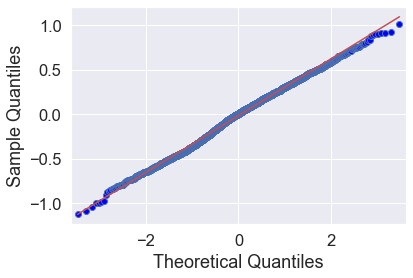

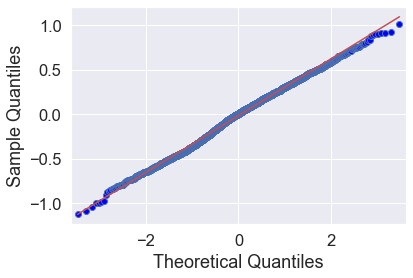

In [125]:
data = kc_log.copy()

y = data['logPrice']
X = data.drop(['logPrice'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

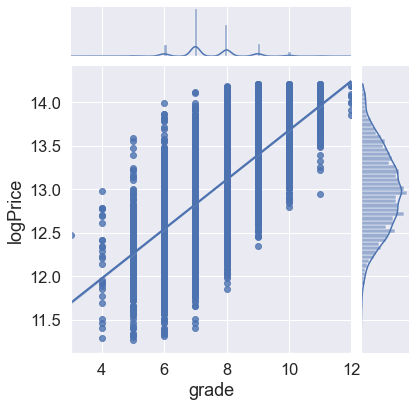

In [126]:
sns.jointplot(x= kc_log['grade'], y= kc_log['logPrice'], data= kc_log, kind='reg')

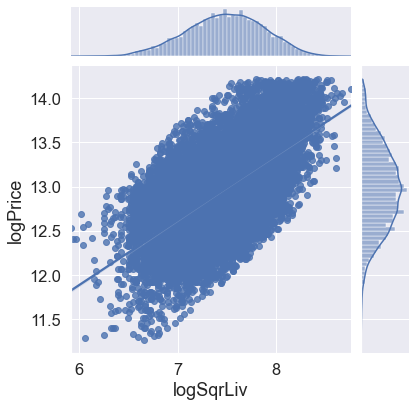

In [127]:
sns.jointplot(x= kc_log['logSqrLiv'], y= kc_log['logPrice'], data= kc_log, kind='reg')

### Check for homoscedasticity

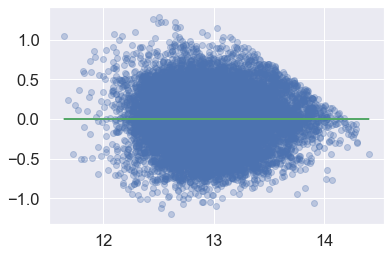

In [128]:
plt.scatter(model_3.predict(kc_log), model_3.resid, alpha = .3)
plt.plot(model_3.predict(kc_log), [0 for i in range(len(kc_log))], c='g')

In [129]:
kc_log.head(1)

,logPrice,logSqrLiv,logSqLot,logSqliv15,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,12.309982,7.07327,8.639411,7.200425,3,1.0,1.0,0.0,0.0,3,7


In [130]:
# log transformed variables
for col in ['bedrooms', 'bathrooms', 'logSqrLiv',
    'grade', 'logSqLot', 'logSqliv15']:
    f = 'logPrice' + '~' + col
    print(col.upper())
    single_lin_model3 = ols(formula= f, data=kc_log).fit()
    display(single_lin_model3.summary())

BEDROOMS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     1817.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:31:23   Log-Likelihood:                -11516.
No. Observations:               18803   AIC:                         2.304e+04
Df Residuals:                   18801   BIC:                         2.305e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3500      0.015    819.391      0.000      12.320      12.380
bedrooms       0.1975      0.005     42.630      0.000       0.188       0.207
==============================================================================
Omnibus:                       89.162   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.118
Skew:                           0.007   Prob(JB):                     7.24e-15
Kurtosis:                       2.712   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BATHROOMS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     5247.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:31:23   Log-Likelihood:                -10070.
No. Observations:               18803   AIC:                         2.014e+04
Df Residuals:                   18801   BIC:                         2.016e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3274      0.009   1302.432      0.000      12.309      12.346
bathrooms      0.3245      0.004     72.434      0.000       0.316       0.333
==============================================================================
Omnibus:                      152.921   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.381
Skew:                           0.057   Prob(JB):                     7.94e-24
Kurtosis:                       2.650   Cond. No.                         7.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LOGSQRLIV


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.135e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:31:23   Log-Likelihood:                -7942.2
No. Observations:               18803   AIC:                         1.589e+04
Df Residuals:                   18801   BIC:                         1.590e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4786      0.052    144.724      0.000       7.377       7.580
logSqrLiv      0.7348      0.007    106.555      0.000       0.721       0.748
==============================================================================
Omnibus:                      252.153   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.597
Skew:                          -0.026   Prob(JB):                     1.21e-33
Kurtosis:                       2.563   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

GRADE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                 1.322e+04
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:31:23   Log-Likelihood:                -7378.4
No. Observations:               18803   AIC:                         1.476e+04
Df Residuals:                   18801   BIC:                         1.478e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8407      0.019    577.651      0.000      10.804      10.878
grade          0.2838      0.002    114.968      0.000       0.279       0.289
==============================================================================
Omnibus:                       10.655   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.443
Skew:                           0.045   Prob(JB):                      0.00540
Kurtosis:                       2.927   Cond. No.                         55.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LOGSQLOT


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     47.41
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           5.95e-12
Time:                        16:31:23   Log-Likelihood:                -12360.
No. Observations:               18803   AIC:                         2.472e+04
Df Residuals:                   18801   BIC:                         2.474e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.7083      0.039    323.979      0.000      12.631      12.785
logSqLot       0.0303      0.004      6.885      0.000       0.022       0.039
==============================================================================
Omnibus:                       39.179   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.907
Skew:                          -0.011   Prob(JB):                     1.18e-07
Kurtosis:                       2.799   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LOGSQLIV15


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     8513.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:31:23   Log-Likelihood:                -8872.3
No. Observations:               18803   AIC:                         1.775e+04
Df Residuals:                   18801   BIC:                         1.776e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6700      0.068     97.490      0.000       6.536       6.804
logSqliv15     0.8406      0.009     92.268      0.000       0.823       0.859
==============================================================================
Omnibus:                        2.904   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.817
Skew:                          -0.003   Prob(JB):                        0.245
Kurtosis:                       2.940   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""